# Random Forest - Regression
### Plus: An Additional Analysis of Various Regression Methods!

### The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [12]:
df.shape

(300, 2)

In [13]:
df.columns = ['signal','density']

In [14]:
df.columns

Index(['signal', 'density'], dtype='object')

<Axes: xlabel='signal', ylabel='density'>

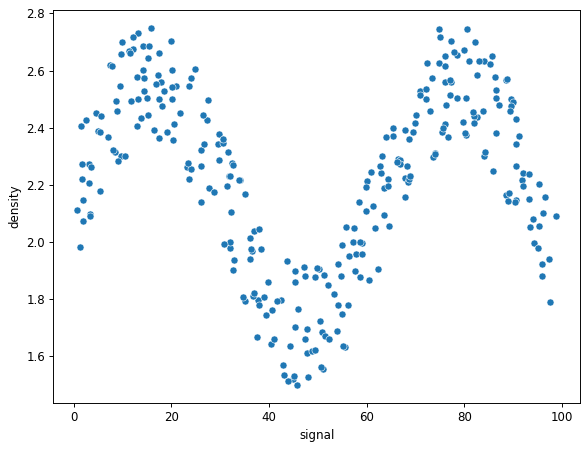

In [15]:
plt.figure(figsize=(8,6),dpi=85)
sns.scatterplot(data=df,x='signal',y='density')

In [16]:
df['signal'].shape

(300,)

In [17]:
type(df['signal'])

pandas.core.series.Series

In [24]:
x = df['signal'].values.reshape(-1,1)
y = df['density']

In [25]:
x.shape

(300, 1)

In [26]:
type(x)

numpy.ndarray

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [31]:
lr_pred = lr_model.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
rmse

0.2570051996584629

In [34]:
# Create x_test
sig_range = np.arange(0,100)
sig_range 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [35]:
lr_out = lr_model.predict(sig_range.reshape(-1,1))
lr_out #y_test

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

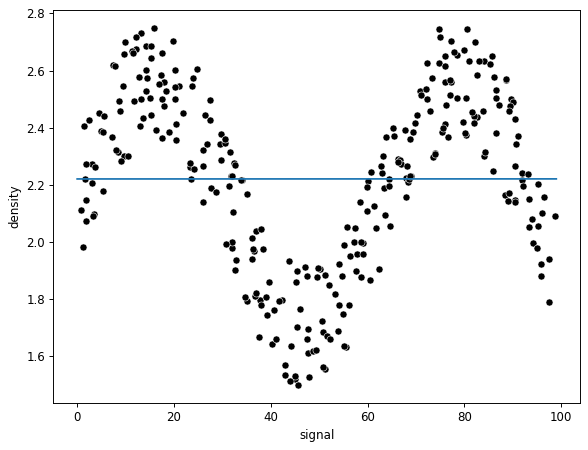

In [40]:
plt.figure(figsize=(8,6),dpi=85)
sns.scatterplot(data=df,x='signal',y='density',color='black')
plt.plot(sig_range,lr_out)

In [41]:
lr_model = LinearRegression()

### Create function (run_model) to pass every model

In [44]:
def run_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print(f'RMSE : {rmse}')
    
    sig_range = np.arange(0,100)
    output = model.predict(sig_range.reshape(-1,1))
    
    plt.figure(figsize=(8,6),dpi=85)
    sns.scatterplot(data=df,x='signal',y='density',color='black')
    plt.plot(sig_range,output)

RMSE : 0.2570051996584629


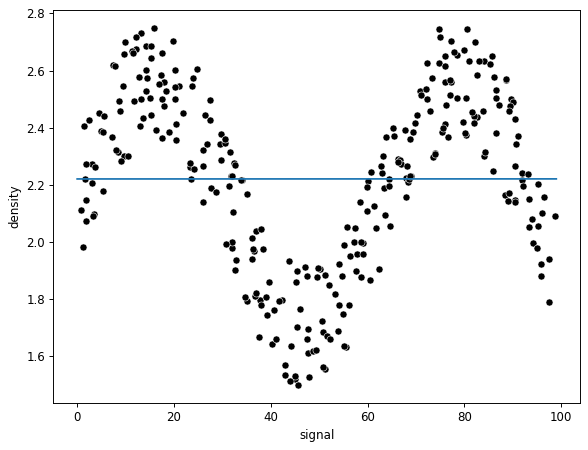

In [45]:
#x_train, x_test, y_train, y_test
run_model(lr_model,x_train,y_train,x_test,y_test)

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

RMSE : 0.28173095637255835


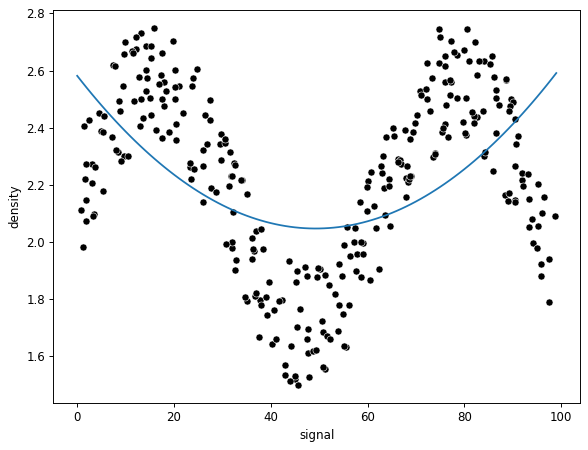

In [48]:
pip = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pip,x_train,y_train,x_test,y_test)

RMSE : 0.16269005292763578


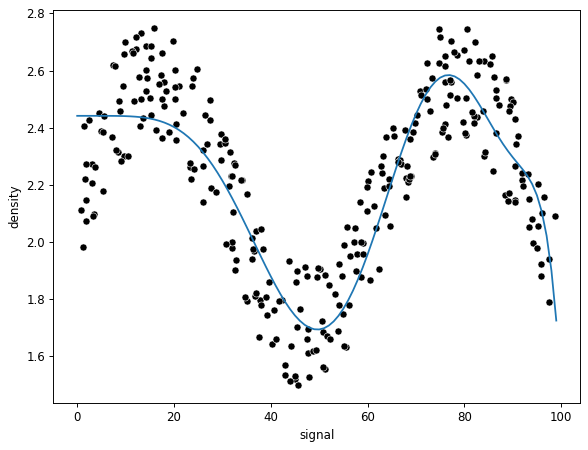

In [49]:
pip = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pip,x_train,y_train,x_test,y_test)

In [50]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


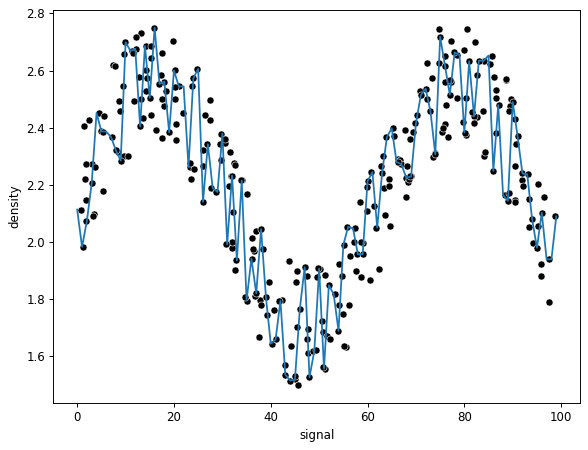

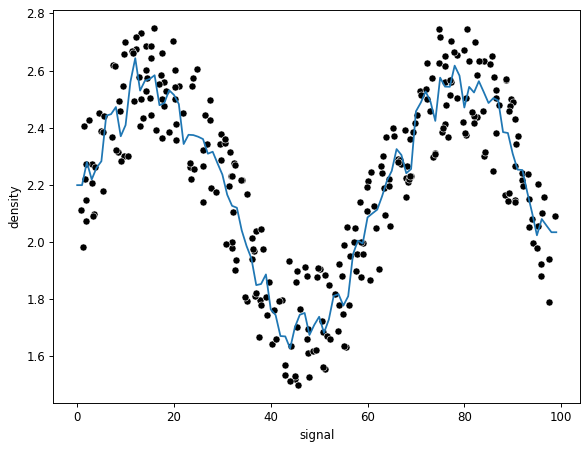

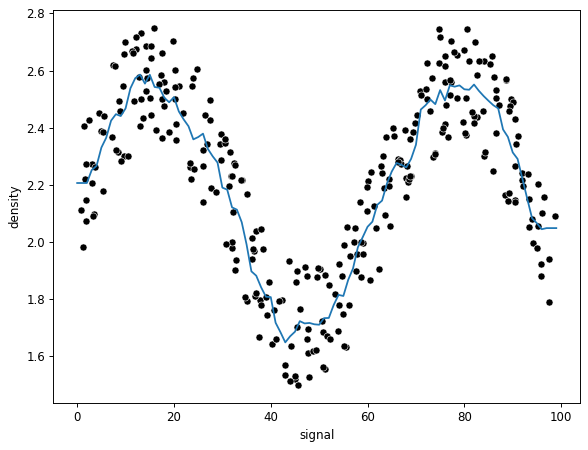

In [51]:
preds = {}
k_val = [1,5,10]
for n in k_val:
    kmodel = KNeighborsRegressor(n_neighbors=n)
    run_model(kmodel,x_train,y_train,x_test,y_test)

RMSE : 0.1523487028635337


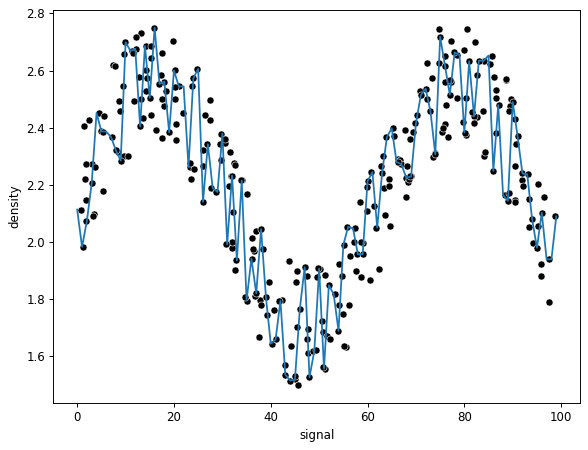

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
run_model(dtr,x_train,y_train,x_test,y_test)

RMSE : 0.12646999302046696


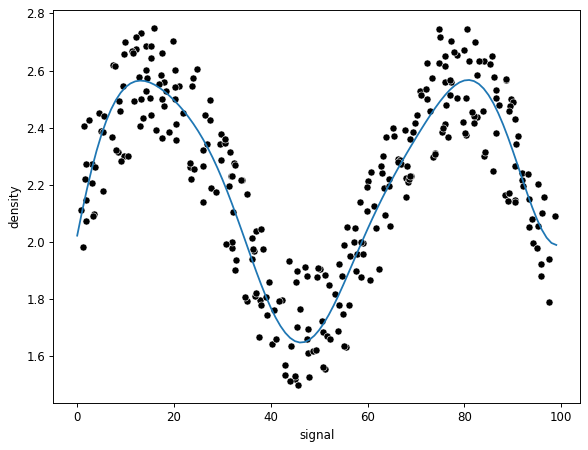

In [55]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}
svr = SVR()
grid_model = GridSearchCV(svr,param_grid)
run_model(grid_model,x_train,y_train,x_test,y_test)

In [56]:
grid_model.best_params_

{'C': 1000, 'gamma': 'scale'}

RMSE : 0.1458891655382023
RMSE : 0.1330592456365131
RMSE : 0.13423652346958825
RMSE : 0.13443874310672452


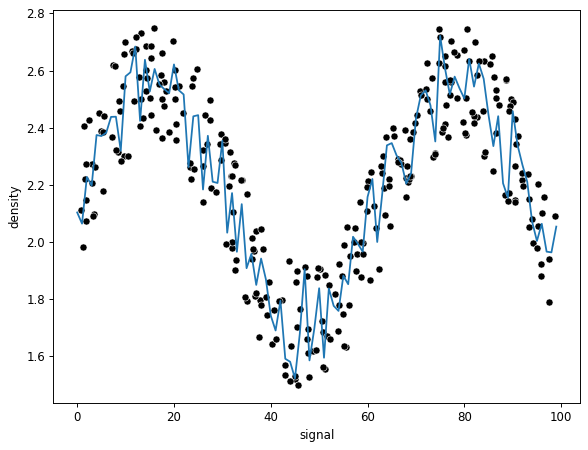

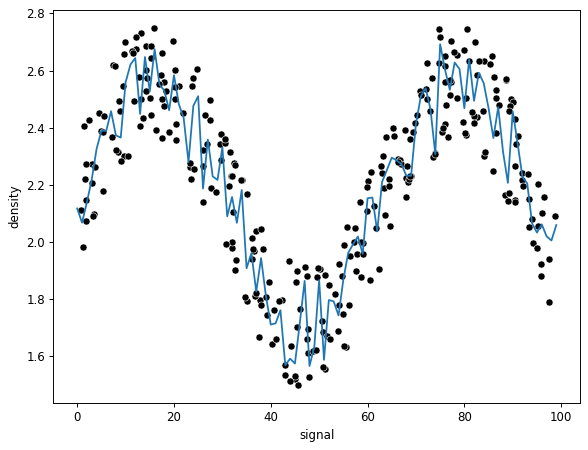

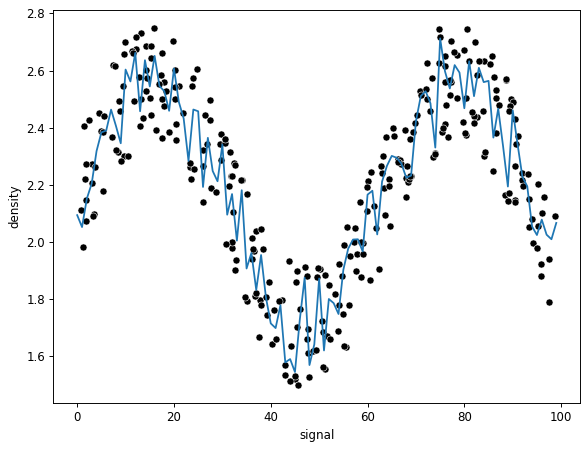

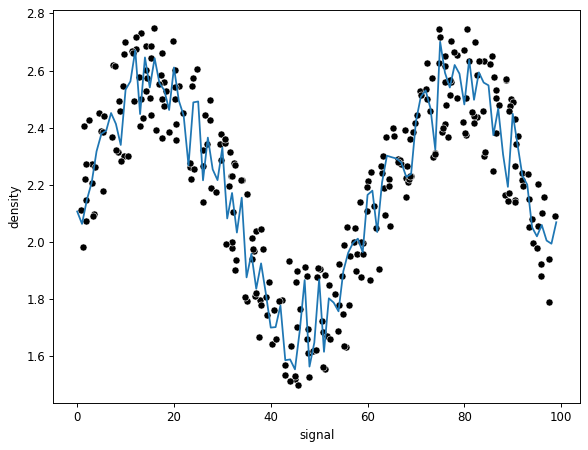

In [57]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100,150]
for n in trees:
    rfr = RandomForestRegressor(n_estimators=n)
    run_model(rfr,x_train,y_train,x_test,y_test)
    

## VotingRegressor
The `VotingRegressor` in `scikit-learn` is an ensemble learning method that combines the predictions of multiple base estimators (regressors) to improve the overall performance. It works by averaging the predictions of the individual regressors, which can help to reduce overfitting and improve generalization.

Here’s a breakdown of what the `VotingRegressor` does:

1. **Combining Predictions**: It takes multiple regressors (models) and combines their predictions. In your case, it combines the predictions of `lr_model` (likely a linear regression model) and `pip` (likely a pipeline that includes preprocessing and another regressor).

2. **Averaging Predictions**: By default, `VotingRegressor` uses a simple average of the predictions from the individual models. This means that the final prediction is the mean of the predictions from `lr_model` and `pip`.

3. **Weighted Averaging (Optional)**: You can also specify weights for each model if you want to give more importance to one model over the other. For example, if you believe `lr_model` is more accurate, you can assign it a higher weight.


### Key Points:
- **Estimators**: The `estimators` parameter is a list of tuples, where each tuple contains a name (string) and the model object. In your case, `lr_model` and `pip` are the models being combined.
- **Averaging**: The predictions from `lr_model` and `pip` are averaged to produce the final output.
- **Flexibility**: You can add more models to the list if you want to combine more than two models.

### When to Use:
- **Diverse Models**: When you have multiple models that perform well but in different ways, combining them can often lead to better performance.
- **Reducing Variance**: Averaging predictions from different models can reduce the variance and improve the robustness of the predictions.

### Example with Weights:
If you want to give more weight to one model, you can do so by passing the `weights` parameter:
```python
vot_model = VotingRegressor(estimators=[
    ('lr_model', lr_model),
    ('pip', pip)
], weights=[0.7, 0.3])  # 70% weight to lr_model, 30% to pip
```

This would mean that the prediction from `lr_model` contributes 70% to the final prediction, while `pip` contributes 30%.

In summary, `VotingRegressor` is a powerful tool for combining the strengths of multiple regression models to produce more accurate and robust predictions.

In [58]:
from sklearn.ensemble import VotingRegressor
vot_model = VotingRegressor(estimators=[
                                         ('lr_model',lr_model),
                                         ('pip',pip),
                                         ('kmodel',kmodel),
                                         ('dtr',dtr),
                                         ('rfr',rfr),
                                         ('grid_model',grid_model)],
                                        )

In [59]:
vot_model.fit(x_train,y_train)

VotingRegressor(estimators=[('lr_model', LinearRegression()),
                            ('pip',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=10)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('kmodel', KNeighborsRegressor(n_neighbors=10)),
                            ('dtr', DecisionTreeRegressor()),
                            ('rfr', RandomForestRegressor(n_estimators=150)),
                            ('grid_model',
                             GridSearchCV(estimator=SVR(),
                                          param_grid={'C': [0.01, 0.1, 1, 5, 10,
                                                            100, 1000],
                                                      'gamma': ['auto',
                                                                'scale']}))])

RMSE : 0.1328772096787327


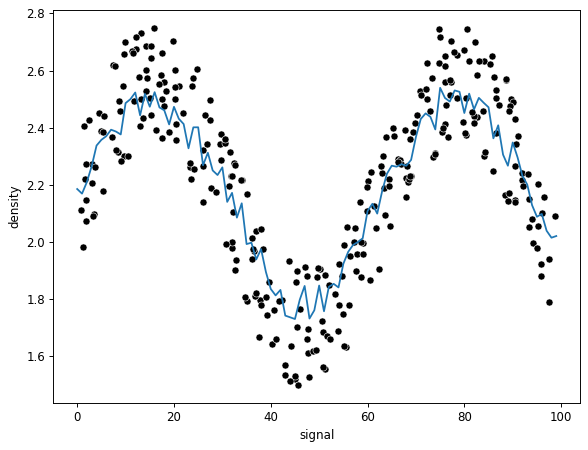

In [60]:
run_model(vot_model,x_train,y_train,x_test,y_test)

In [61]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.1420648664906493


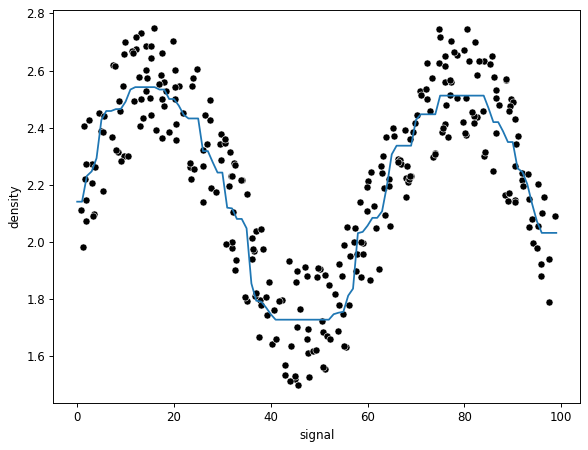

In [63]:
ada_model = AdaBoostRegressor(n_estimators=50)
run_model(ada_model,x_train,y_train,x_test,y_test)

RMSE : 0.15234206558113678


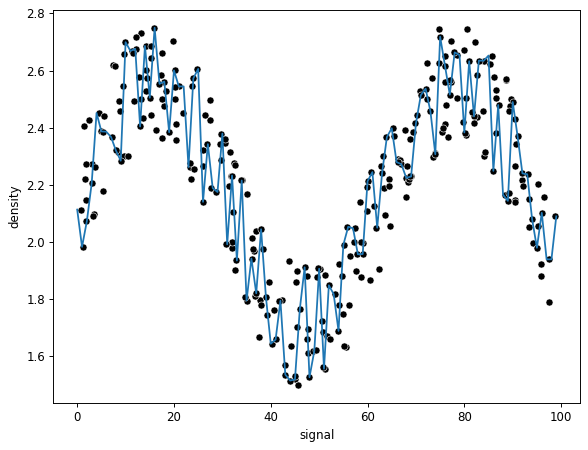

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model = GradientBoostingRegressor(learning_rate=1,n_estimators=120)
run_model(grad_model,x_train,y_train,x_test,y_test)

### `staged_predict(x_val)`
- This method generates predictions for the validation set (`x_val`) at each stage of the boosting process (i.e., after each tree is added).
- It returns an **iterator** that yields predictions for all `n_estimators` (120 in this case).

---

### `mean_squared_error(y_val, y_pred)`
- Computes the **Mean Squared Error (MSE)** between the true target values (`y_val`) and the predicted values (`y_pred`) at each stage.

---

### `errors`
- A list of MSE values, one for each boosting stage.
- This allows us to track how the **validation error** changes as more trees are added.

---

### `np.argmin(errors)`
- Finds the **index** of the minimum value in the `errors` list.
- This corresponds to the number of trees (`n_estimators`) that resulted in the **lowest validation error**.

---

### `bst_n_estimators`
- The **optimal number of trees** to use for the best model.

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=67)

RMSE : 0.09000212609398582


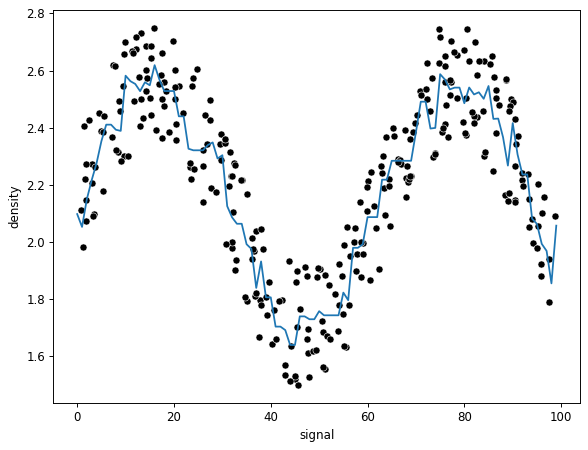

In [66]:
gbrt = GradientBoostingRegressor(n_estimators=77)
gbrt.fit(x_train, y_train)
run_model(gbrt,x_train,y_train,x_test,y_test)

## What is `warm_start=True`?

### **Purpose**  
When `warm_start=True`, the model retains its state (e.g., the trees already built) after each call to `fit()`.  
This allows you to add more estimators (trees) to the model without starting from scratch.

### **Advantage**  
- Avoids retraining the entire model from the beginning.  
- Saves time and computational resources.  


In [68]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y)

# Initialize the GradientBoostingRegressor with warm_start=True
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=1, warm_start=True)

# Variables to track the best model and early stopping
min_val_error = float("inf")  # Initialize minimum validation error to infinity
error_going_up = 0            # Counter for consecutive increases in validation error
best_n_estimators = 1         # Track the best number of estimators

# Iteratively add trees and track validation error
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators  # Set the number of estimators
    gbrt.fit(x_train, y_train)        # Fit the model (warm start)
    
    # Predict on the validation set
    y_pred = gbrt.predict(x_val)
    
    # Calculate the mean squared error
    val_error = mean_squared_error(y_val, y_pred)
    
    # Check if the validation error improved
    if val_error < min_val_error:
        min_val_error = val_error      # Update the minimum validation error
        best_n_estimators = n_estimators  # Update the best number of estimators
        error_going_up = 0             # Reset the counter
    else:
        error_going_up += 1            # Increment the counter
    
    # Early stopping condition
    if error_going_up == 5:
        print(f"Early stopping at {n_estimators} estimators.")
        break

# Train the final model with the best number of estimators
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(x_train, y_train)

print(f"Best number of estimators: {best_n_estimators}")
print(f"Minimum validation error: {min_val_error}")

Early stopping at 43 estimators.
Best number of estimators: 38
Minimum validation error: 0.020119712983549157


RMSE : 0.11079330095065397


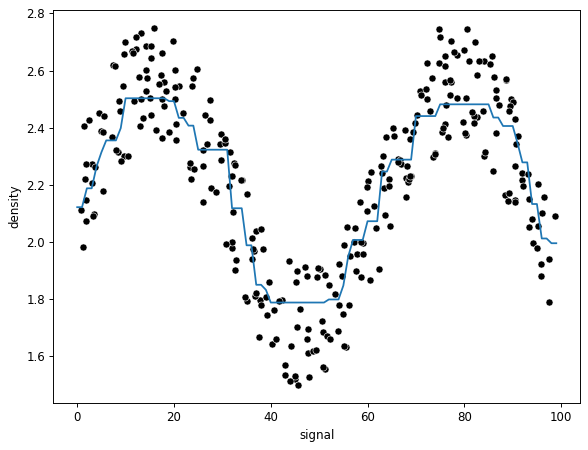

In [69]:
run_model(gbrt_best,x_train,y_train,x_test,y_test)

## Explanation of Changes

### **Early Stopping Logic**
- `min_val_error`: Tracks the minimum validation error encountered during training.
- `error_going_up`: Counts how many consecutive times the validation error has not improved.
- If the validation error does not improve for **5 consecutive iterations** (`error_going_up == 5`),  
  the loop breaks, and training stops early.

### **Tracking the Best Model**
- `best_n_estimators`: Stores the number of estimators that resulted in the lowest validation error.

### **Warm Start**
- The `warm_start=True` parameter ensures that the model retains its state (trees already built)  
  between iterations, making the process efficient.

### **Final Model**
- After the loop, a new `GradientBoostingRegressor` is trained with the **optimal number** of estimators (`best_n_estimators`).
